In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Makeover Monday 2020 W7 –– World Wealth

For this week's challenge, we are looking at global wealth by nation and continent.

Source Article: [All the World's Wealth in One Visual](https://howmuch.net/articles/distribution-worlds-wealth-2019)

Data Source: [Credit Suisse](https://www.credit-suisse.com/)

Makeover Monday Data: [data.world](https://data.world/makeovermonday/2020w7)

## Data Analysis

### Loading the Data:

In [2]:
df = pd.read_excel('WorldWealth.xlsx')

### First Look at Data:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
Country        214 non-null object
Region         206 non-null object
Wealth ($B)    205 non-null object
dtypes: object(3)
memory usage: 5.1+ KB


In [4]:
df.head()

,Country,Region,Wealth ($B)
0,United States,North America,"$105,990"
1,China,China,"$63,827"
2,Japan,Asia-Pacific,"$24,992"
3,Germany,Europe,"$14,660"
4,United Kingdom,Europe,"$14,341"


### Data Cleaning:

In [5]:
# Remove the '$' and ',' from wealth column
df['Wealth ($B)'] = df['Wealth ($B)'].str.replace(',', '')
df['Wealth ($B)'] = df['Wealth ($B)'].str.replace('$', '')

df.head()

,Country,Region,Wealth ($B)
0,United States,North America,105990
1,China,China,63827
2,Japan,Asia-Pacific,24992
3,Germany,Europe,14660
4,United Kingdom,Europe,14341


In [6]:
# looking into missing values
df[df.isnull().any(axis=1)]

,Country,Region,Wealth ($B)
97,Bosnia and Herzegovina,NaN,NaN
98,Europe,NaN,NaN
154,Northern Mariana Islands,NaN,NaN
155,Asia-Pacific,NaN,NaN
195,Central African Republic,NaN,NaN
196,Africa,NaN,NaN
203,St. Vincent and the Grenadines,NaN,NaN
204,Latin America,NaN,NaN
213,Venezuela,Latin America,NaN


In [16]:
df1 = df.dropna().copy()

df1['Wealth ($B)'] = pd.to_numeric(df1['Wealth ($B)'])

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 212
Data columns (total 3 columns):
Country        205 non-null object
Region         205 non-null object
Wealth ($B)    205 non-null int64
dtypes: int64(1), object(2)
memory usage: 6.4+ KB


In [17]:
df1.describe(include = 'all')

,Country,Region,Wealth ($B)
count,205,205,205.000000
unique,205,7,NaN
top,Reunion,Asia-Pacific,NaN
freq,1,63,NaN
mean,NaN,NaN,1758.409756
std,NaN,NaN,9010.680069
min,NaN,NaN,0.000000
25%,NaN,NaN,12.000000
50%,NaN,NaN,64.000000
75%,NaN,NaN,377.000000


The data covers 205 countries from 7 regions. The minimum national wealth in billions of dollars is 0, the mean is 1758.41 with a standard deviation of 9010.68, the median is 64, and the max is 105990.

### Initial Graph:

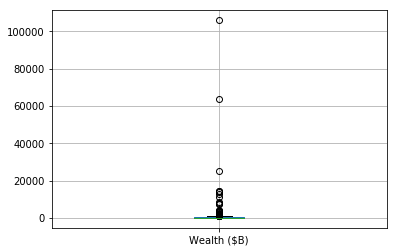

In [18]:
fig = df1.boxplot()

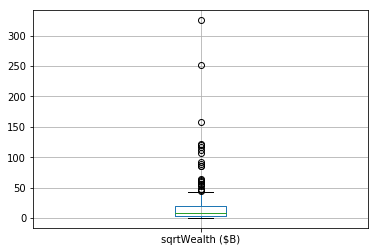

In [25]:
df1['sqrtWealth ($B)'] = np.sqrt(df1['Wealth ($B)'])

fig = df1.boxplot('sqrtWealth ($B)')

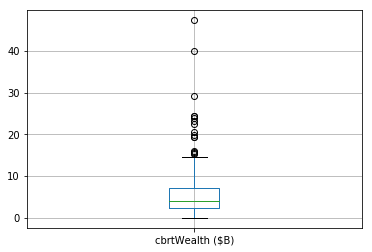

In [26]:
df1['cbrtWealth ($B)'] = np.cbrt(df1['Wealth ($B)'])

fig = df1.boxplot('cbrtWealth ($B)')

In [ ]:
fig.get_figure().savefig("pdplot_WorldWeath.png")

fig

### Data Exploration:

#### Birth Years with 100% Wartime

In [16]:
df.loc[df['Percent_Lifetime_in_US_Wartime']==1]

,Birth_Year,Percent_Lifetime_in_US_Wartime
96,2001,1.0
97,2002,1.0
98,2003,1.0
99,2004,1.0
100,2005,1.0
101,2006,1.0
102,2007,1.0
103,2008,1.0
104,2009,1.0
105,2010,1.0


Every American born since 2001 has never experienced the United States in peacetime.

#### Birth Years more than 50% Wartime

In [17]:
df.loc[(df['Percent_Lifetime_in_US_Wartime']>.48) &
       (df['Percent_Lifetime_in_US_Wartime']<.52)]

,Birth_Year,Percent_Lifetime_in_US_Wartime
36,1941,0.481
55,1960,0.483
56,1961,0.492
57,1962,0.500
58,1963,0.509
59,1964,0.518
61,1966,0.519
62,1967,0.509
63,1968,0.500
64,1969,0.490


Americans born in 1963-1967 and 1981-present have spent the majority of their lives in wartime.

#### Reverse Engineering Specific War Dates and Statistics

In [18]:
# Determine pivots between peacetime and wartime:
# In peacetime, the % lifetime in wartime will be increasing
# because we are removing childhood peacetime experience with
# each additional year. In wartime, it will be decreasing or 
# stagnant.

back_diffs = df['Percent_Lifetime_in_US_Wartime'].diff()
frwd_diffs = df['Percent_Lifetime_in_US_Wartime'].diff(periods=-1)
war_state = np.where(frwd_diffs < 0, 
                  np.where(back_diffs < 0,
                           'wartime', 'peacetime'),
                  'wartime')


df['War_State'] = war_state

df.head(20)

,Birth_Year,Percent_Lifetime_in_US_Wartime,War_State
0,1905,0.348,peacetime
1,1906,0.351,peacetime
2,1907,0.354,peacetime
3,1908,0.357,peacetime
4,1909,0.360,peacetime
5,1910,0.364,peacetime
6,1911,0.367,peacetime
7,1912,0.370,peacetime
8,1913,0.374,peacetime
9,1914,0.377,peacetime


In [19]:
# assign wars to the periods of wartime
wars = ['WW1','WW2','Korean War','Vietnam War','Gulf War','Afghanistan War']

# attach war column to original dataset
df['War'] = None

df_wars = df.loc[(df['War_State']== 'increase')]

# fill war column during each war period
curr_war = -1
old_year = 0
for index, row in df.iterrows():
    if row['War_State'] == 'wartime':
        if old_year + 1 == row['Birth_Year']:
            df.at[index, 'War'] = wars[curr_war]
        else:
            curr_war += 1
            df.at[index, 'War'] = wars[curr_war]
        old_year = row['Birth_Year']
    
df.head(20)

,Birth_Year,Percent_Lifetime_in_US_Wartime,War_State,War
0,1905,0.348,peacetime,None
1,1906,0.351,peacetime,None
2,1907,0.354,peacetime,None
3,1908,0.357,peacetime,None
4,1909,0.360,peacetime,None
5,1910,0.364,peacetime,None
6,1911,0.367,peacetime,None
7,1912,0.370,peacetime,None
8,1913,0.374,peacetime,None
9,1914,0.377,peacetime,None


In [20]:
df_wars_summ = df.groupby('War').describe()
df_wars_summ.sort_values(df_wars_summ.columns[5], ascending = False)

Birth_Year                                             \
                     count    mean       std     min      25%     50%   
War                                                                     
Afghanistan War       19.0  2010.0  5.627314  2001.0  2005.50  2010.0   
Gulf War               2.0  1991.5  0.707107  1991.0  1991.25  1991.5   
Vietnam War           10.0  1969.5  3.027650  1965.0  1967.25  1969.5   
Korean War             5.0  1952.0  1.581139  1950.0  1951.00  1952.0   
WW2                    6.0  1943.5  1.870829  1941.0  1942.25  1943.5   
WW1                    3.0  1918.0  1.000000  1917.0  1917.50  1918.0   

                                 Percent_Lifetime_in_US_Wartime            \
                     75%     max                          count      mean   
War                                                                         
Afghanistan War  2014.50  2019.0                           19.0  1.000000   
Gulf War         1991.75  1992.0                            2.0  0.684500   
Vietnam War      1971.75  1974.0                           10.0  0.483400   
Korean War       1953.00  1954.0                            5.0  0.455600   
WW2              1944.75  1946.0                            6.0  0.463833   
WW1              1918.50  1919.0                            3.0  0.382000   

                                                                   
                      std    min      25%     50%      75%    max  
War                                                                
Afghanistan War  0.000000  1.000  1.00000  1.0000  1.00000  1.000  
Gulf War         0.007778  0.679  0.68175  0.6845  0.68725  0.690  
Vietnam War      0.031045  0.435  0.46075  0.4850  0.50675  0.527  
Korean War       0.012661  0.439  0.44800  0.4560  0.46400  0.471  
WW2              0.013106  0.446  0.45500  0.4645  0.47250  0.481  
WW1              0.006000  0.376  0.37900  0.3820  0.38500  0.388

We see here how different wars extended wartime experience for Americans. The Vietnam War and Afghanistan Wars are distinctly long. We also see here that the Vietnam War manages to temporarily push the percentage in wartime above 50% for a short period in the mid 1960s before the percentage resurges in peacetime births near the Afghanistan War. 

### Deeper Data Graph:

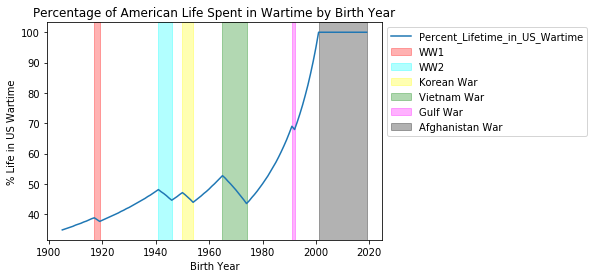

In [23]:
fig, ax = plt.subplots()
ax.plot(df['Birth_Year'], 100*df['Percent_Lifetime_in_US_Wartime'])
ax.set(xlabel = 'Birth Year', 
       ylabel = '% Life in US Wartime', 
       title = 'Percentage of American Life Spent in Wartime by Birth Year')

colors = ['red', 'cyan', 'yellow', 'green', 'magenta', 'black']
index = 0
for war in wars:
    temp_array = df.loc[df['War']==war,'Birth_Year']
    ax.axvspan(min(temp_array), max(temp_array), 
               color = colors[index], 
               alpha=0.3, 
               label = war)
    index += 1
ax.legend(bbox_to_anchor=(1, 1))

fig.savefig("pyplot_Wartime_Living.png")
plt.show()

### Tableau Graph:

My Tableau graph is published [here](https://public.tableau.com/views/2020W6-US_Wartime_Living/USWartimeLife?:display_count=y&publish=yes&:origin=viz_share_link).